<a href="https://colab.research.google.com/github/afonsosr2/bootcamp_DS_Alura/blob/main/Modulo_02/Bootcamp_DS_Mod02_Aula06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp Data Science Aplicada

### **Organização:**
Alura Github: https://github.com/alura-cursos

LinkedIn: https://www.linkedin.com/school/aluracursos/

<br>

### **Resolução das aulas e desafios por:**
Afonso Augusto Rios
<br>
Email: afonsosr2@gmail.com

Github: https://github.com/afonsosr2

LinkedIn: https://www.linkedin.com/in/afonsosr2/

# Módulo 02 - Tratamento, exploração e visualização de dados

## Aula 06
*   Acompanhamento da Aula 06
*   Resolução dos Desafios



Olá, continuaremos nossas análises sobre os dados relativos à saúde no Brasil através do Bootcamp de Data Science Aplicada da Alura. 

Nesse módulo, seguiremos as análises dos dados financeiros do SUS. Inicialmente vamos focar no tratamento e manipulação dos dados para análises mais complexas, utilizando recursos mais avançados do Pandas e da Linguagem Python como um todo. 

Teremos também a inserção de dados externos que serão utilizados para enriquecer a análise exploratória e realizar comparações mais precisas entre os diferentes estados. Além disso, discutiremos mais sobre boas práticas de visualização, interpretação de gráficos e sua construção com o Seaborn.

Ao longo das aulas vou aplicar o conteúdo aprendido dentro desse curso e resolver os desafios, aproveitando também para fazer minhas próprias análises e olhando os dados de forma mais crítica. 

Vamos começar nosso mergulho? 

### Importando a Base de Dados



Em nossa análise, vamos importar os dados do site da DATASUS disponibilizados no [link](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/).

Para a Aula 06, exploraremos os dados relativos aos Procedimentos Hospitalares do SUS nos estados entre os anos de 2008 a 2021 e vamos nos debruçar um pouco mais nas funções de tempo do Python, para que possamos fazer buscas mais rápidas e precisas quando determinarmos certas faixas de tempo no nosso Dataframe.

Inicialmente, vamos selecionar os dados dos Procedimentos Hospitalares do SUS levando em conta o valor total dos gastos no ano/mês de atendimento por Unidade Federativa.

In [126]:
#importando a biblioteca do Pandas para a leitura dos dados através de um arquivo .csv
import pandas as pd

dados = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/A111646189_28_143_208.csv", encoding="ISO-8859-1",
                    skiprows = 3, sep=";", skipfooter = 12, thousands = ".",
                    decimal = ",")

# Modificando o modo de leitura dos valores totais dos gastos.
pd.options.display.float_format = "{:.2f}".format

dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,16 Amapá,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2351019.41,2342718.63,2286375.90,1774558.12,2761503.37,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,153

### Pré-Tratamento dos dados






Agora, vamos tratar os dados para que possamos trabalhar apenas com as colunas que possuem todos os valores totais dos custos com o SUS nas Unidades da Federação.

Vamos criar um novo DataFrame que guarde esses valores para analisarmos e visualizarmos esses dados.

Depois, vamos ajustar o nosso dataframe para que a visualização por gráfico fique mais fluida. Então, iremos separar os 'ids' das unidades da federação para que apareça apenas o nome dos estados e tiraremos a coluna de totais.

In [127]:
# Passando para uma variável do tipo list a posição das colunas com valores numéricos
# e colocando a Unidade de Federação na primeira coluna. 
colunas_completas = dados.mean().index.tolist()
colunas_completas.insert(0,"Unidade da Federação")

Após a criação da lista, vamos criar o nosso novo dataframe seguindo os critérios já explanados.

In [128]:
# Criando o DataFrame dados_completos com as colunas com os valores númericos completos 
# e colocando a Unidade de Federação como index.
dados_completos = dados[colunas_completas]
dados_completos = dados_completos.set_index("Unidade da Federação")

# Separando o Id e renomeando o index só com os estados
id_uf = dados_completos.index.str.slice(stop=2)
dados_completos.index = dados_completos.index.str.slice(start=3)

# Retirando a coluna de totais, separando o período de 2008 para 2021
# e ordenando pelo maior total
dados_completos = dados_completos.sort_values("Total", ascending=False)
dados_completos = dados_completos.drop("Total", axis = 1)
dados_completos = dados_completos / 1000000
dados_completos = dados_completos.iloc[:,6:]

dados_completos.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172.96,170.56,170.34,172.46,175.49,179.57,180.01,180.15,191.86,190.93,177.09,192.41,178.64,217.01,215.13,212.91,212.72,214.08,215.27,214.25,216.12,209.18,192.16,213.51,195.79,239.41,221.20,231.92,224.04,224.16,248.76,224.12,239.35,225.64,210.71,229.15,221.66,241.45,229.92,250.82,...,259.64,279.65,254.22,285.35,286.37,291.68,279.10,286.15,295.67,277.69,302.77,278.27,266.77,291.89,268.08,287.15,292.87,309.14,281.62,307.20,303.58,294.08,303.87,282.79,273.36,303.87,272.05,277.94,255.18,314.28,328.29,361.99,350.27,338.87,328.06,324.60,326.85,324.12,268.19,177.41
Minas Gerais,70.30,79.12,79.05,79.27,79.62,82.21,80.37,82.41,88.61,84.49,88.93,99.02,83.68,100.26,91.83,97.29,95.72,100.05,98.98,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.84,105.49,99.67,103.37,107.84,104.34,100.53,101.94,99.54,107.77,103.15,111.08,106.09,115.49,...,138.37,146.51,130.73,151.51,150.70,153.60,150.26,156.72,160.48,146.00,157.29,148.17,145.42,153.24,142.69,151.98,157.96,163.64,154.17,166.78,161.77,157.44,166.17,152.17,152.47,158.27,141.46,147.65,127.45,142.75,157.28,177.47,182.18,181.42,174.59,168.56,166.38,155.06,119.88,79.78
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,...,105.56,116.13,107.08,122.33,124.73,127.08,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.46,132.61,124.87,134.71,127.17,126.20,133.87,126.22,113.57,122.33,116.13,114.78,97.78,111.01,115.20,123.86,125.09,121.77,127.51,133.44,122.15,106.95,83.13,43.48
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,55.70,61.52,52.10,65.11,61.59,64.40,63.09,69.14,66.06,65.22,67.57,64.19,62.24,65.49,56.96,69.93,66.49,69.11,67.57,70.07,70.88,65.08,66.56,66.10,61.74,66.92,61.37,69.00,66.23,72.17,...,82.74,91.83,77.58,91.08,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.14,95.86,103.04,98.57,94.37,96.97,91.01,88.76,97.61,85.49,84.88,76.81,87.78,96.80,108.54,111.76,110.11,113.89,116.74,116.83,102.32,84.40,37.80
Rio de Janeiro,44.13,42.90,45.31,43.95,44.11,44.36,42.50,43.07,44.55,41.35,43.02,60.89,40.67,52.75,48.92,51.18,57.24,53.49,51.24,48.49,48.69,49.71,44.41,55.99,44.83,54.47,78.13,56.03,51.44,53.87,57.87,53.74,52.38,50.24,50.89,74.01,61.15,55.35,55.82,59.09,...,67.38,72.45,65.06,74.43,74.58,79.42,75.99,77.58,78.92,72.87,79.19,74.02,70.83,79.66,74.14,75.06,76.86,82.67,78.69,88.18,83.62,81.56,82.53,74.78,75.15,80.41,73.15,74.60,69.44,89.73,88.14,95.94,89.80,81.89,80.57,82.81,90.57,87.20,60.87,49.15


### Visualização dos gastos da Bahia por mês com o SUS:




Para plotarmos o quanto o Estado da Bahia gastou por mês com o SUS precisamos ajustar nosso dataframe antes de utilizar a biblioteca do Seaborn

In [129]:
dados_mensais = dados_completos.T
dados_mensais.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,20.36,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


Vamos plotar esses gastos em um gráfico de linhas:

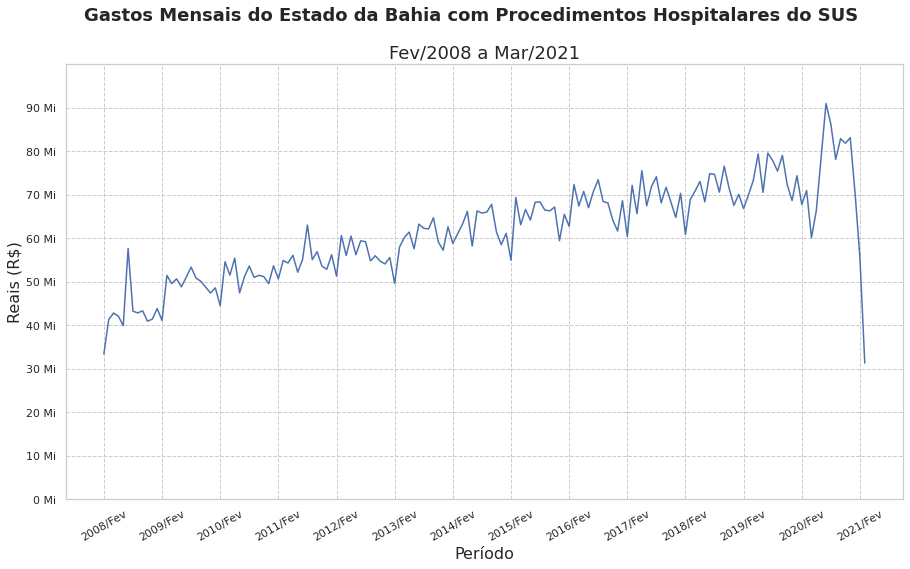

In [130]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_mensais,x=dados_mensais.index, y="Bahia")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:} Mi"))
ax.set_yticks(range(0, 100, 10))

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("Gastos Mensais do Estado da Bahia com Procedimentos Hospitalares do SUS",
             size = 18, weight='bold')
plt.title("Fev/2008 a Mar/2021", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.grid(linestyle = '--')

# Ajustando o gráfico de 0 a 100 milhões
plt.ylim(0, 100)

# Oculta as informações no topo do gráfico
plt.show()

### Tratando os dados para utilizarmos funções de tempo corretamente:





In [131]:
from datetime import date

meses = {
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr": 4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11,
    "Dez": 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)


dados_mensais.index = dados_mensais.index.map(para_dia)
dados_mensais.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.96,70.30,48.86,45.90,44.13,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.56,79.12,55.61,52.93,42.90,41.32,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.34,79.05,56.12,51.97,45.31,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.46,79.27,55.57,51.68,43.95,42.09,31.42,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.49,79.62,56.09,53.76,44.11,39.91,28.95,28.99,29.46,20.36,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.30,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


Vamos plotar novamente os dados da Bahia para ver o que aconteceu com a variável de tempo em nosso Dataframe. Desta vez vamos retirar o ```set_major_locator``` para ver como ele se comportará:

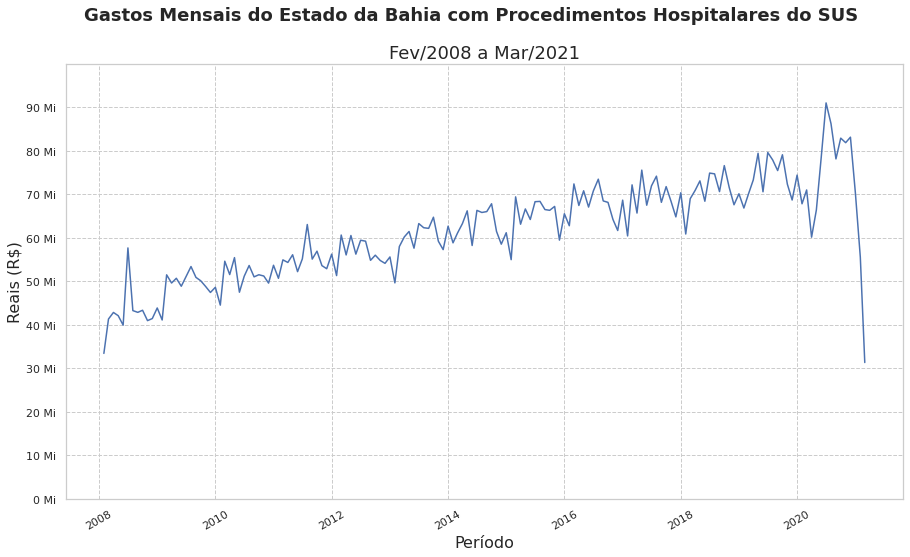

In [132]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_mensais,x=dados_mensais.index, y="Bahia")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:} Mi"))
ax.set_yticks(range(0, 100, 10))

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("Gastos Mensais do Estado da Bahia com Procedimentos Hospitalares do SUS",
             size = 18, weight='bold')
plt.title("Fev/2008 a Mar/2021", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.grid(linestyle = '--')

# Ajustando o gráfico de 0 a 100 milhões
plt.ylim(0, 100)

# Oculta as informações no topo do gráfico
plt.show()

#### Visualização de mais dados dentro do mesmo gráfico:


Inicialmente, vamos aplicar o melt para transfomar nosso Dataframe em uma tabela com o tempo, Unidade da Federação e valor.

Mas, primeiro, tiraremos a variável de tempo do index e colocaremos na primeira coluna de nossos dados:



In [133]:
dados_mensais_divididos = dados_mensais.reset_index().melt(id_vars=["index"], value_vars=dados_mensais.columns)
dados_mensais_divididos.columns = ["dia_mes_ano", "uf", "gasto"]
dados_mensais_divididos["dia_mes_ano"] = dados_mensais_divididos["dia_mes_ano"].astype('datetime64')

dados_mensais_divididos.head()

,dia_mes_ano,uf,gasto
0,2008-02-01,São Paulo,172.96
1,2008-03-01,São Paulo,170.56
2,2008-04-01,São Paulo,170.34
3,2008-05-01,São Paulo,172.46
4,2008-06-01,São Paulo,175.49


##### Mini-desafio: Partindo da tabela que sofreu um melt voltar ao Dataframe:

---



In [134]:
dados_mensais_divididos.pivot(index="dia_mes_ano", columns="uf", values="gasto").head()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
dia_mes_ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,7.93,8.28,70.30,48.86,10.87,20.13,26.22,9.71,9.11,45.90,44.13,1.94,0.77,24.41,4.64,172.96,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.32,30.09,11.63,12.26,20.99,14.75,9.42,9.79,79.12,55.61,12.35,22.15,30.72,10.43,10.13,52.93,42.90,1.96,0.88,27.48,5.02,170.56,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,9.39,9.00,79.05,56.12,12.68,23.44,30.59,10.23,10.96,51.97,45.31,2.14,0.90,27.81,5.27,170.34,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.09,31.19,11.90,11.79,19.16,14.54,9.38,9.84,79.27,55.57,13.26,23.86,31.42,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.46,5.34
2008-06-01,2.11,10.30,1.42,8.65,39.91,29.46,11.97,11.89,20.36,14.55,9.45,10.26,79.62,56.09,12.25,23.50,28.95,10.47,10.45,53.76,44.11,2.62,0.94,28.99,4.98,175.49,5.40




---



#### Visualização de mais dados dentro do mesmo gráfico (continuação):



Para nossa visualização, eu escolhi fazer uma comparação dos 3 estados mais populosos do Nordeste: Bahia, Pernambuco e Ceará.

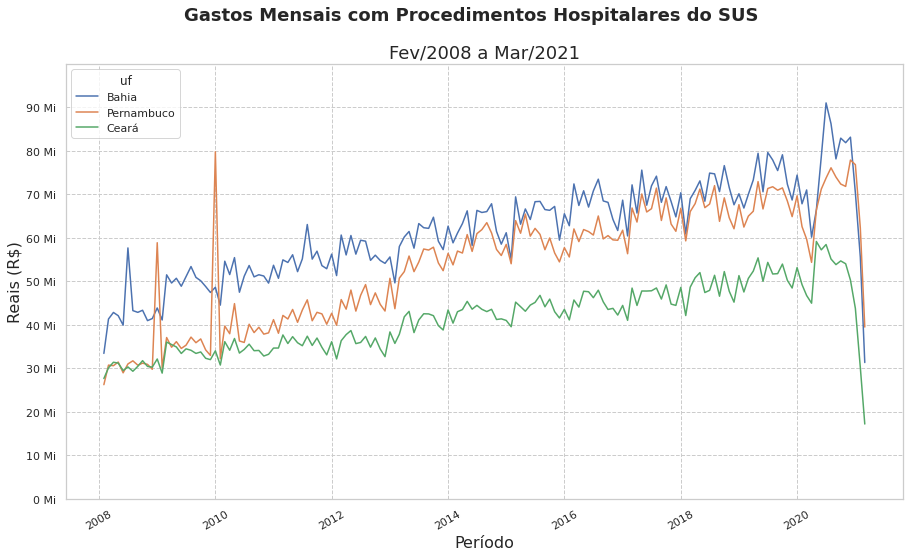

In [135]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Separando os estados BA, PE e CE:
dados_mensais_divididos_BA_PE_CE = dados_mensais_divididos.query("uf == ['Bahia','Pernambuco','Ceará']")

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_mensais_divididos_BA_PE_CE, x="dia_mes_ano", y="gasto", hue="uf",)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:} Mi"))
ax.set_yticks(range(0, 100, 10))

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("Gastos Mensais com Procedimentos Hospitalares do SUS",
             size = 18, weight='bold')
plt.title("Fev/2008 a Mar/2021", size = 18)
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.grid(linestyle = '--')

# Ajustando o gráfico de 0 a 100 milhões
plt.ylim(0, 100)

# Oculta as informações no topo do gráfico
plt.show()

Analisando brevemente os dados dos três estados, podemos notar uma pequena evolução nos gastos com o passar dos anos no período de 2008 a 2021, com uma alta queda no início do ano 2021, que talvez possa ser explicada por ainda não ter todos os dados dos procedimentos ainda disponíveis.

É possível notar que também os mesmos estados tem uma tendência bem similar, salvo dois grandes picos em Pernambuco no ano de 2009 e 2010. Seria necessário buscar um pouco mais para descobrir o porquê dessa alta tão signifcativa nos gastos de Pernambuco. Este período compreende os surtos da epidemia de H1N1(2009) e as enchentes na Região da Mata (2010 a 2011) que podem talvez ter certa influência nos números, mas seria necessário investigar esse caso.

Outra curiosidade demonstra que os gastos de Pernambuco, que nos primeiros 4 anos de nossa análise seguia mais os gastos do Ceará, entre os anos de 2012 até o dado momento está muito próximo dos gastos da Bahia. Ou seja, houve um crescimento relativamente alto em 2013 até o patamar dos gastos do governo da Bahia e este prosseguiu lado a lado até os dias atuais. 

#### Comparando gastos ano a ano

Primeiro vamos separar em duas colunas os meses e anos:

In [136]:
dados_mensais_divididos["mes"] = dados_mensais_divididos["dia_mes_ano"].dt.month
dados_mensais_divididos["ano"] = dados_mensais_divididos["dia_mes_ano"].dt.year

dados_mensais_divididos.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172.96,2,2008
1,2008-03-01,São Paulo,170.56,3,2008
2,2008-04-01,São Paulo,170.34,4,2008
3,2008-05-01,São Paulo,172.46,5,2008
4,2008-06-01,São Paulo,175.49,6,2008


Agora, vamos separar os estados da Bahia e do Paraná, como estados em regiões e climas diferentes, para analisar se há uma grande diferença no comportamento dos gastos com o SUS. Primeiro, faremos o gráfico dos gastos da Bahia com Procedimentos Hospitalares no SUS por mês a cada ano, de 2008 a 2021:

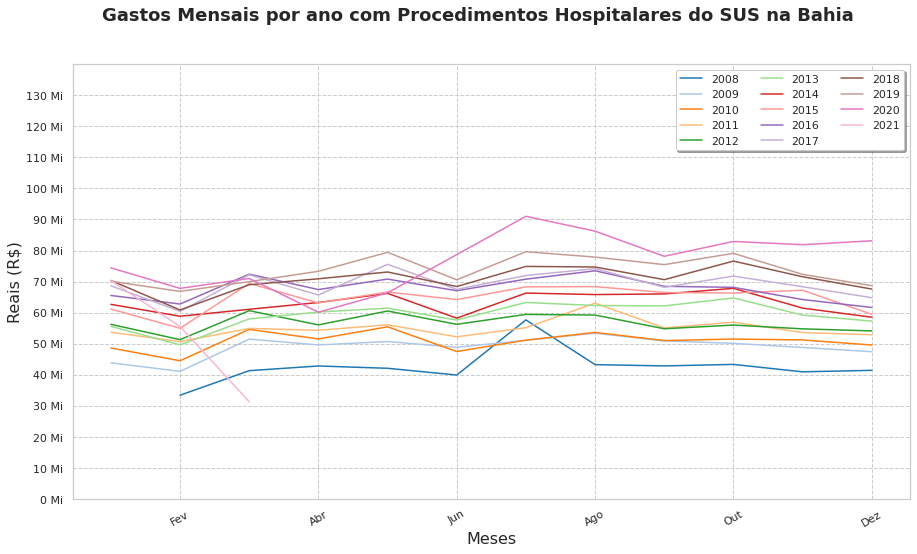

In [137]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid")
plt.figure(figsize=(15, 8))

# Separando o estado da BA:
dados_mensais_divididos_BA = dados_mensais_divididos.query("uf == 'Bahia'")

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_mensais_divididos_BA, x="mes", y="gasto", hue="ano", palette='tab20')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:} Mi"))
ax.set_yticks(range(0, 140, 10))
ax.set_xticks(range(2,13,2))
ax.set_xticklabels([mes for mes in meses if meses[mes] % 2 == 0])

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("Gastos Mensais por ano com Procedimentos Hospitalares do SUS na Bahia",
             size = 18, weight='bold')
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Meses", fontdict={'fontsize': 16})
plt.legend(loc='best', ncol=3, shadow=True, fancybox=True)
plt.grid(linestyle = '--')

# Ajustando o gráfico de 0 a 140 milhões
plt.ylim(0, 140)

# Oculta as informações no topo do gráfico
plt.show()

Agora, faremos o mesmo processo, só que agora com o Estado do Paraná:

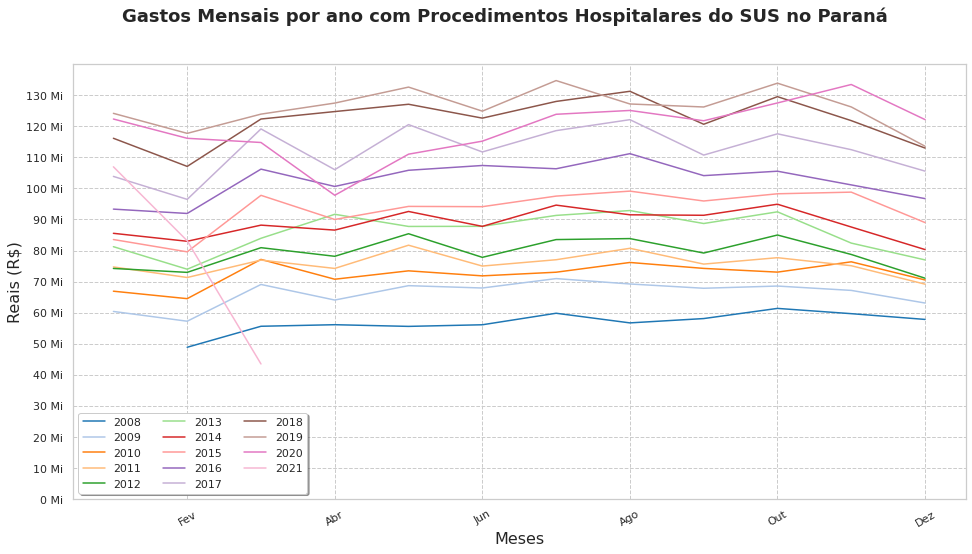

In [138]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid")
plt.figure(figsize=(16, 8))

# Escolhendo o Paraná como um estado de clima diferente):
dados_mensais_divididos_PR = dados_mensais_divididos.query("uf == 'Paraná'")

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_mensais_divididos_PR, x="mes", y="gasto", hue="ano", palette='tab20')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:} Mi"))
ax.set_yticks(range(0, 140, 10))
ax.set_xticks(range(2,13,2))
ax.set_xticklabels([mes for mes in meses if meses[mes] % 2 == 0])

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("Gastos Mensais por ano com Procedimentos Hospitalares do SUS no Paraná",
             size = 18, weight='bold')
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Meses", fontdict={'fontsize': 16})
plt.legend(loc='best', ncol=3, shadow=True, fancybox=True)
plt.grid(linestyle = '--')

# Ajustando o gráfico de 0 a 140 milhões
plt.ylim(0, 140)

# Oculta as informações no topo do gráfico
plt.show()

O Paraná tem maiores gastos totais com o SUS do que a Bahia. Uma semelhança que podemos notar entre os estados ao observar os gráficos é de que normalmente nos meses correspondentes ao verão temos uma redução dos gastos em relação a outros meses do ano, salvo alguns casos como 2020 no Paraná. 

In [139]:
dados_mensais_divididos_BA.head()

,dia_mes_ano,uf,gasto,mes,ano
790,2008-02-01,Bahia,33.41,2,2008
791,2008-03-01,Bahia,41.32,3,2008
792,2008-04-01,Bahia,42.83,4,2008
793,2008-05-01,Bahia,42.09,5,2008
794,2008-06-01,Bahia,39.91,6,2008


In [140]:
gasto_por_ano = dados_mensais_divididos_BA.groupby("ano").sum()
gasto_por_ano.head()

,gasto,mes
ano,,
2008,469.02,77
2009,587.26,78
2010,610.27,78
2011,658.60,78
2012,679.34,78


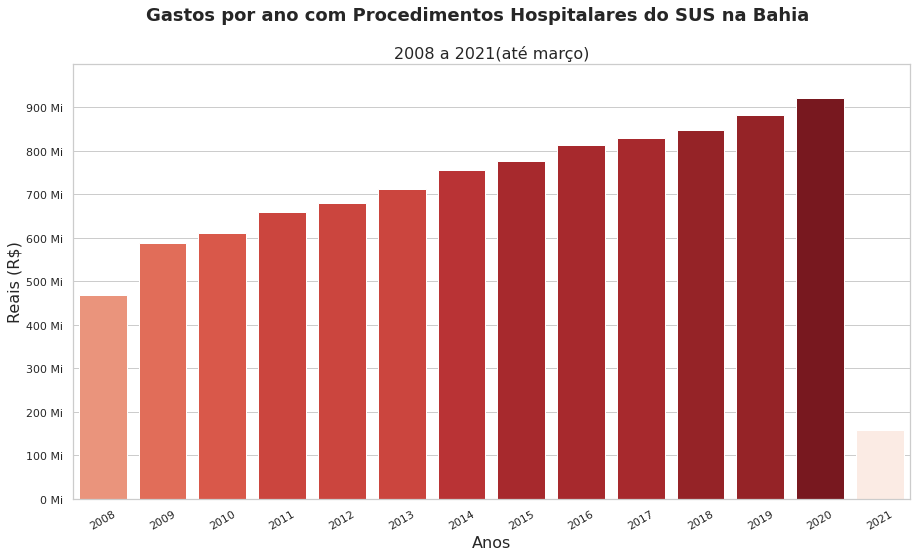

In [141]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid")
plt.figure(figsize=(15, 8))

def cores_pelos_valores(valor, nome_palette):
    # normalizando os valores entre [0, 1]
    valores_normalizados = (valor - min(valor)) / (max(valor) - min(valor))
    # convertendo para os indices de cores
    indices_cor = np.round(valores_normalizados * (len(valor) - 1)).astype(np.int32)
    # usando os indices para definir as cores em ordem crescente
    palette = sns.color_palette(nome_palette, len(valor))
    return np.array(palette).take(indices_cor, axis=0)

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.barplot(data=gasto_por_ano, x=gasto_por_ano.index, y="gasto", palette=cores_pelos_valores(gasto_por_ano["gasto"], "Reds"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:} Mi"))
ax.set_yticks(range(0, 1000, 100))

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("Gastos por ano com Procedimentos Hospitalares do SUS na Bahia", size = 18, weight='bold')
plt.title("2008 a 2021(até março)", fontdict={'fontsize': 16})
plt.ylabel("Reais (R$)", fontdict={'fontsize': 16})
plt.xlabel("Anos", fontdict={'fontsize': 16})

# Ajustando o gráfico de 0 a 1 bilhão
plt.ylim(0, 1000)

# Oculta as informações no topo do gráfico
plt.show()

## Parte 02: Análise de outra base de dados


### Importando as bases de dados:

Para fazer uma nova análise, vamos continuar importando os dados do site da DATASUS disponibilizados no [link](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/).

Para a resolução do desafio da Aula 06, exploraremos os dados relativos aos casos de dengue notificados no Estado da Bahia pelo Ministério da Saúde de acordo com suas microrregiões entre os anos de 2014 a 2020. 

Inicialmente, vamos agrupar os dados levando em conta a quantidade de casos notificados por ano/mês.

In [142]:
# Importando a biblioteca do Pandas para a leitura dos dados através de um arquivo .csv
import pandas as pd

url = {"2014": "https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/Casos_de_Dengue_Bahia_Microrregiao_2014_a_2020/Casos_de_Dengue_2014_Bahia_Microrregiao.csv",
       "2015": "https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/Casos_de_Dengue_Bahia_Microrregiao_2014_a_2020/Casos_de_Dengue_2015_Bahia_Microrregiao.csv",
       "2016": "https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/Casos_de_Dengue_Bahia_Microrregiao_2014_a_2020/Casos_de_Dengue_2016_Bahia_Microrregiao.csv",
       "2017": "https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/Casos_de_Dengue_Bahia_Microrregiao_2014_a_2020/Casos_de_Dengue_2017_Bahia_Microrregiao.csv",
       "2018": "https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/Casos_de_Dengue_Bahia_Microrregiao_2014_a_2020/Casos_de_Dengue_2018_Bahia_Microrregiao.csv",
       "2019": "https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/Casos_de_Dengue_Bahia_Microrregiao_2014_a_2020/Casos_de_Dengue_2019_Bahia_Microrregiao.csv",
       "2020": "https://raw.githubusercontent.com/afonsosr2/bootcamp_DS_Alura/main/dados/Casos_de_Dengue_Bahia_Microrregiao_2014_a_2020/Casos_de_Dengue_2020_Bahia_Microrregiao.csv"
       }

def dados_ano(url, ano):
  # Lendo os dados
  dados_ano = pd.read_csv(url, encoding="ISO-8859-1", skiprows = 3, sep=";", skipfooter = 19)

  # Renomeando a coluna de microrregiao e colocando no index e tirando a coluna de totais
  dados_ano.rename(columns={'Microrregião IBGE de notific':'Microrregiao'}, inplace=True)
  dados_ano = dados_ano.set_index("Microrregiao")
  dados_ano = dados_ano.drop("Total", axis=1) 

  # Renomeando as colunas com o formato mes/ano
  dados_ano.rename(columns=lambda x: x + f"/{ano}", inplace=True)
  return dados_ano

dados_anos = [dados_ano(url["2014"], 2014), dados_ano(url["2015"], 2015),
              dados_ano(url["2016"], 2016), dados_ano(url["2017"], 2017),
              dados_ano(url["2018"], 2018), dados_ano(url["2019"], 2019),
              dados_ano(url["2020"], 2020)]

dados_dengue_BA = pd.concat(dados_anos, axis = 1)

dados_dengue_BA.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,Jan/2014,Fev/2014,Mar/2014,Abr/2014,Mai/2014,Jun/2014,Jul/2014,Ago/2014,Set/2014,Out/2014,Nov/2014,Dez/2014,Jan/2015,Fev/2015,Mar/2015,Abr/2015,Mai/2015,Jun/2015,Jul/2015,Ago/2015,Set/2015,Out/2015,Nov/2015,Dez/2015,Jan/2016,Fev/2016,Mar/2016,Abr/2016,Mai/2016,Jun/2016,Jul/2016,Ago/2016,Set/2016,Out/2016,Nov/2016,Dez/2016,Jan/2017,Fev/2017,Mar/2017,Abr/2017,...,Set/2017,Out/2017,Nov/2017,Dez/2017,Jan/2018,Fev/2018,Mar/2018,Abr/2018,Mai/2018,Jun/2018,Jul/2018,Ago/2018,Set/2018,Out/2018,Nov/2018,Dez/2018,Jan/2019,Fev/2019,Mar/2019,Abr/2019,Mai/2019,Jun/2019,Jul/2019,Ago/2019,Set/2019,Out/2019,Nov/2019,Dez/2019,Jan/2020,Fev/2020,Mar/2020,Abr/2020,Mai/2020,Jun/2020,Jul/2020,Ago/2020,Set/2020,Out/2020,Nov/2020,Dez/2020
29001 Barreiras,4,5,12,38,37,7,6,4,2,2,1,1,6,4,24,182,673,264,97,82,57,21,9,5,13,48,102,44,16,2,2,5,6,5,3,-,5,11,25,13,...,3,8,3,3,7,5,2,9,55,62,24,14,7,8,6,5,38,563,657,814,666,664,190,75,69,34,7,7,44,99,113,97,206,174,107,29,19,10,10,38
29002 Cotegipe,-,-,-,6,-,2,-,-,-,1,4,4,1,-,8,10,36,23,42,5,4,-,1,6,8,27,27,8,7,1,1,-,-,-,3,-,1,2,142,128,...,4,1,1,-,12,16,17,28,44,22,8,-,-,-,3,2,4,17,59,101,133,48,16,2,1,1,6,-,1,2,2,34,130,158,65,14,2,1,1,2
29003 S Maria Vitória,9,15,11,17,27,51,9,3,3,2,1,6,4,7,23,70,131,90,29,9,7,10,6,27,29,96,57,76,28,8,-,1,2,-,4,-,10,8,29,20,...,4,3,4,10,13,14,131,462,362,147,22,21,5,2,2,1,57,46,117,383,1013,408,71,16,6,10,23,8,16,59,127,276,391,309,121,40,18,3,-,5
29004 Juazeiro,10,35,117,343,274,152,90,42,17,26,22,24,16,23,54,97,156,137,106,63,38,29,82,174,52,128,245,158,105,41,32,10,3,7,2,3,9,4,7,6,...,10,6,2,-,5,1,11,84,100,95,80,141,108,102,53,19,44,63,34,34,92,71,47,70,28,33,12,20,27,66,167,461,890,617,239,58,25,28,15,15
29005 Paulo Afonso,-,-,-,2,1,1,4,11,9,2,5,1,9,51,105,152,76,54,64,135,242,132,172,10,12,33,287,413,52,7,2,3,1,-,1,2,1,1,1,2,...,1,-,-,1,1,2,-,2,-,-,1,1,1,-,-,-,1,2,4,11,28,102,167,33,28,31,7,4,-,1,-,17,121,294,170,54,11,5,2,-


### Pré-Tratamento dos dados:

Como demonstrado abaixo, podemos notar que no ano de 2018 temos uma de suas linhas com dados nulos e que algumas colunas ainda estão com o tipo object, mesmo possuindo valores inteiros. 

Logo, temos duas coisas a fazer, descobrir qual linha tem esses valores nulos e preencher os valores representados por (-) como 0.  

In [143]:
dados_dengue_BA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 29001 Barreiras to 29032 Porto Seguro
Data columns (total 84 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Jan/2014  32 non-null     object
 1   Fev/2014  32 non-null     object
 2   Mar/2014  32 non-null     object
 3   Abr/2014  32 non-null     object
 4   Mai/2014  32 non-null     object
 5   Jun/2014  32 non-null     object
 6   Jul/2014  32 non-null     object
 7   Ago/2014  32 non-null     object
 8   Set/2014  32 non-null     object
 9   Out/2014  32 non-null     object
 10  Nov/2014  32 non-null     object
 11  Dez/2014  32 non-null     object
 12  Jan/2015  32 non-null     object
 13  Fev/2015  32 non-null     object
 14  Mar/2015  32 non-null     int64 
 15  Abr/2015  32 non-null     int64 
 16  Mai/2015  32 non-null     int64 
 17  Jun/2015  32 non-null     int64 
 18  Jul/2015  32 non-null     int64 
 19  Ago/2015  32 non-null     int64 
 20  Set/2015  32 non-null     int64

In [144]:
dados_dengue_BA[dados_dengue_BA.isna().any(axis=1)]

,Jan/2014,Fev/2014,Mar/2014,Abr/2014,Mai/2014,Jun/2014,Jul/2014,Ago/2014,Set/2014,Out/2014,Nov/2014,Dez/2014,Jan/2015,Fev/2015,Mar/2015,Abr/2015,Mai/2015,Jun/2015,Jul/2015,Ago/2015,Set/2015,Out/2015,Nov/2015,Dez/2015,Jan/2016,Fev/2016,Mar/2016,Abr/2016,Mai/2016,Jun/2016,Jul/2016,Ago/2016,Set/2016,Out/2016,Nov/2016,Dez/2016,Jan/2017,Fev/2017,Mar/2017,Abr/2017,...,Set/2017,Out/2017,Nov/2017,Dez/2017,Jan/2018,Fev/2018,Mar/2018,Abr/2018,Mai/2018,Jun/2018,Jul/2018,Ago/2018,Set/2018,Out/2018,Nov/2018,Dez/2018,Jan/2019,Fev/2019,Mar/2019,Abr/2019,Mai/2019,Jun/2019,Jul/2019,Ago/2019,Set/2019,Out/2019,Nov/2019,Dez/2019,Jan/2020,Fev/2020,Mar/2020,Abr/2020,Mai/2020,Jun/2020,Jul/2020,Ago/2020,Set/2020,Out/2020,Nov/2020,Dez/2020
29018 Entre Rios,-,-,1,1,3,1,-,1,-,-,-,-,1,-,4,18,28,2,15,3,4,9,-,1,4,43,3,-,-,-,-,-,1,-,1,-,1,-,-,-,...,1,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,2,115,110,149,208,76,55,52,20,12,17,64,80,37,73,100,34,21,18,10,2,2


Através do teste acima, conseguimos localizar a linha que faltava informações que é a da Microrregião de Entre Rios. Como não queremos excluir qualquer microrregião, vamos preeencher os valores com 0 e ficarmos atento que não temos dados conclusivos para a Microrrregião de Entre Rios no período de 2018. Além disso, todos os valores com ("-") também receberá 0, pois representa a ausência de casos no período.

In [145]:
# Trocando o "-" do nosso dataframe por zero 
dados_dengue_BA.replace("-", 0 , inplace=True)

# Trocando o NaN de Entre Rios por zero
dados_dengue_BA.fillna(0, inplace = True)

# E transformando nossa Serie de dados no tipo int64
dados_dengue_BA = dados_dengue_BA.astype('int64')

# Testando se os tipos dos dados foram atualizados
dados_dengue_BA.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 29001 Barreiras to 29032 Porto Seguro
Columns: 84 entries, Jan/2014 to Dez/2020
dtypes: int64(84)
memory usage: 21.2+ KB


In [146]:
# Tirando os códigos da Microrregiões
dados_dengue_BA.index = dados_dengue_BA.index.str.slice(start=6)
dados_dengue_BA.head()

,Jan/2014,Fev/2014,Mar/2014,Abr/2014,Mai/2014,Jun/2014,Jul/2014,Ago/2014,Set/2014,Out/2014,Nov/2014,Dez/2014,Jan/2015,Fev/2015,Mar/2015,Abr/2015,Mai/2015,Jun/2015,Jul/2015,Ago/2015,Set/2015,Out/2015,Nov/2015,Dez/2015,Jan/2016,Fev/2016,Mar/2016,Abr/2016,Mai/2016,Jun/2016,Jul/2016,Ago/2016,Set/2016,Out/2016,Nov/2016,Dez/2016,Jan/2017,Fev/2017,Mar/2017,Abr/2017,...,Set/2017,Out/2017,Nov/2017,Dez/2017,Jan/2018,Fev/2018,Mar/2018,Abr/2018,Mai/2018,Jun/2018,Jul/2018,Ago/2018,Set/2018,Out/2018,Nov/2018,Dez/2018,Jan/2019,Fev/2019,Mar/2019,Abr/2019,Mai/2019,Jun/2019,Jul/2019,Ago/2019,Set/2019,Out/2019,Nov/2019,Dez/2019,Jan/2020,Fev/2020,Mar/2020,Abr/2020,Mai/2020,Jun/2020,Jul/2020,Ago/2020,Set/2020,Out/2020,Nov/2020,Dez/2020
Barreiras,4,5,12,38,37,7,6,4,2,2,1,1,6,4,24,182,673,264,97,82,57,21,9,5,13,48,102,44,16,2,2,5,6,5,3,0,5,11,25,13,...,3,8,3,3,7,5,2,9,55,62,24,14,7,8,6,5,38,563,657,814,666,664,190,75,69,34,7,7,44,99,113,97,206,174,107,29,19,10,10,38
Cotegipe,0,0,0,6,0,2,0,0,0,1,4,4,1,0,8,10,36,23,42,5,4,0,1,6,8,27,27,8,7,1,1,0,0,0,3,0,1,2,142,128,...,4,1,1,0,12,16,17,28,44,22,8,0,0,0,3,2,4,17,59,101,133,48,16,2,1,1,6,0,1,2,2,34,130,158,65,14,2,1,1,2
S Maria Vitória,9,15,11,17,27,51,9,3,3,2,1,6,4,7,23,70,131,90,29,9,7,10,6,27,29,96,57,76,28,8,0,1,2,0,4,0,10,8,29,20,...,4,3,4,10,13,14,131,462,362,147,22,21,5,2,2,1,57,46,117,383,1013,408,71,16,6,10,23,8,16,59,127,276,391,309,121,40,18,3,0,5
Juazeiro,10,35,117,343,274,152,90,42,17,26,22,24,16,23,54,97,156,137,106,63,38,29,82,174,52,128,245,158,105,41,32,10,3,7,2,3,9,4,7,6,...,10,6,2,0,5,1,11,84,100,95,80,141,108,102,53,19,44,63,34,34,92,71,47,70,28,33,12,20,27,66,167,461,890,617,239,58,25,28,15,15
Paulo Afonso,0,0,0,2,1,1,4,11,9,2,5,1,9,51,105,152,76,54,64,135,242,132,172,10,12,33,287,413,52,7,2,3,1,0,1,2,1,1,1,2,...,1,0,0,1,1,2,0,2,0,0,1,1,1,0,0,0,1,2,4,11,28,102,167,33,28,31,7,4,0,1,0,17,121,294,170,54,11,5,2,0


### Visualização do número de casos da Microrregião de Santo Antonio de Jesus:


Para plotarmos o quanto a Microrregião de Santo Antonio de Jesus apresentou de casos de dengue por mês, entre 2014 a 2020, precisamos ajustar nosso dataframe antes de utilizar a biblioteca do Seaborn.

In [147]:
dados_mensais_dengue = dados_dengue_BA.T
dados_mensais_dengue.head()

,Barreiras,Cotegipe,S Maria Vitória,Juazeiro,Paulo Afonso,Barra,B Jesus da Lapa,Senhor Bonfim,Irecê,Jacobina,Itaberaba,F Santana,Jeremoabo,Euclides Cunha,Ribeira Pombal,Serrinha,Alagoinhas,Entre Rios,Catu,S Antônio Jesus,Salvador,Boquira,Seabra,Jequié,Livr.Brumado,Guanambi,Brumado,Vit.Conquista,Itapetinga,Valença,Ilhéus-Itabuna,Porto Seguro
Jan/2014,4,0,9,10,0,7,2,6,18,9,11,159,1,30,2,73,1,0,0,10,180,12,4,29,0,5,5,30,1,3,141,43
Fev/2014,5,0,15,35,0,5,8,6,10,12,9,178,1,29,9,69,2,0,3,23,271,4,12,36,1,5,16,21,1,9,170,49
Mar/2014,12,0,11,117,0,5,10,15,4,26,12,116,0,201,9,34,3,1,6,16,451,8,15,60,0,6,25,39,0,5,168,55
Abr/2014,38,6,17,343,2,48,8,13,16,101,76,184,4,89,7,42,12,1,20,87,952,12,72,52,0,14,26,55,1,7,407,88
Mai/2014,37,0,27,274,1,28,28,28,14,65,51,136,4,78,7,61,39,3,17,71,701,63,283,49,5,13,20,41,0,7,316,61


#### Tratando os dados para utilizarmos funções de tempo corretamente:


In [148]:
from datetime import date

meses = {
    "Jan": 1,
    "Fev": 2,
    "Mar": 3,
    "Abr": 4,
    "Mai": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Set": 9,
    "Out": 10,
    "Nov": 11,
    "Dez": 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[4:])
  mes: str = ano_mes[:3]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)


dados_mensais_dengue.index = dados_mensais_dengue.index.map(para_dia)
dados_mensais_dengue.head()

,Barreiras,Cotegipe,S Maria Vitória,Juazeiro,Paulo Afonso,Barra,B Jesus da Lapa,Senhor Bonfim,Irecê,Jacobina,Itaberaba,F Santana,Jeremoabo,Euclides Cunha,Ribeira Pombal,Serrinha,Alagoinhas,Entre Rios,Catu,S Antônio Jesus,Salvador,Boquira,Seabra,Jequié,Livr.Brumado,Guanambi,Brumado,Vit.Conquista,Itapetinga,Valença,Ilhéus-Itabuna,Porto Seguro
2014-01-01,4,0,9,10,0,7,2,6,18,9,11,159,1,30,2,73,1,0,0,10,180,12,4,29,0,5,5,30,1,3,141,43
2014-02-01,5,0,15,35,0,5,8,6,10,12,9,178,1,29,9,69,2,0,3,23,271,4,12,36,1,5,16,21,1,9,170,49
2014-03-01,12,0,11,117,0,5,10,15,4,26,12,116,0,201,9,34,3,1,6,16,451,8,15,60,0,6,25,39,0,5,168,55
2014-04-01,38,6,17,343,2,48,8,13,16,101,76,184,4,89,7,42,12,1,20,87,952,12,72,52,0,14,26,55,1,7,407,88
2014-05-01,37,0,27,274,1,28,28,28,14,65,51,136,4,78,7,61,39,3,17,71,701,63,283,49,5,13,20,41,0,7,316,61


Plotando o gráfico de linhas:

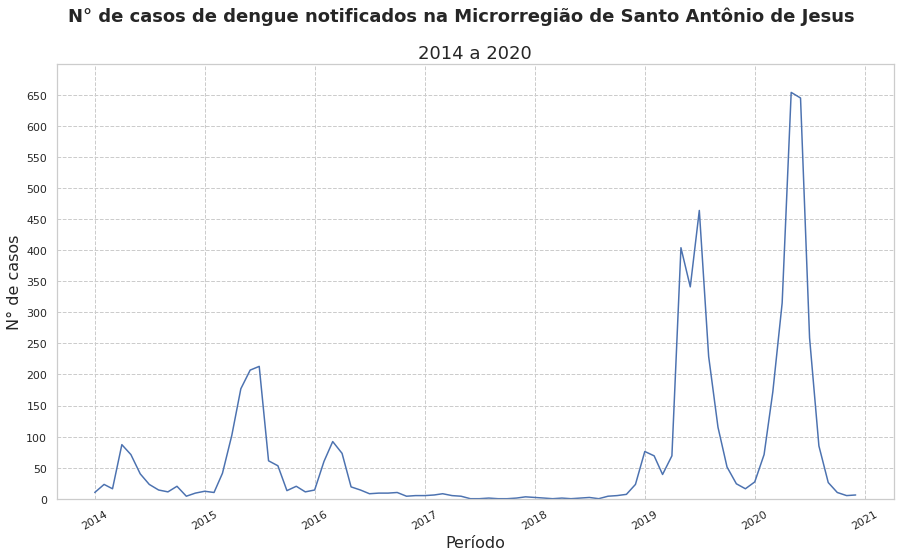

In [149]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Desenhando o gráfico
ax = sns.lineplot(data=dados_mensais_dengue,x=dados_mensais_dengue.index, y="S Antônio Jesus")
ax.set_yticks(range(0, 700, 50))

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("N° de casos de dengue notificados na Microrregião de Santo Antônio de Jesus",
             size = 18, weight='bold')
plt.title("2014 a 2020", size = 18)
plt.ylabel("N° de casos", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.grid(linestyle = '--')

# # Ajustando o gráfico de 0 a 700 casos
plt.ylim(0, 700)

# Oculta as informações no topo do gráfico
plt.show()

#### Visualização de mais dados dentro do mesmo gráfico:


Inicialmente, vamos aplicar o melt para transfomar nosso Dataframe em uma tabela com o tempo, Microrregião e quantidade de casos.

Mas, primeiro, tiraremos a variável de tempo do index e colocaremos na primeira coluna de nossos dados:



In [150]:
dados_mensais_divididos = dados_mensais_dengue.reset_index().melt(id_vars=["index"], value_vars=dados_mensais_dengue.columns)
dados_mensais_divididos.columns = ["ano_mes_dia", "microrregiao", "qtd_casos"]
dados_mensais_divididos["ano_mes_dia"] = dados_mensais_divididos["ano_mes_dia"].astype('datetime64')

dados_mensais_divididos.head()

,ano_mes_dia,microrregiao,qtd_casos
0,2014-01-01,Barreiras,4
1,2014-02-01,Barreiras,5
2,2014-03-01,Barreiras,12
3,2014-04-01,Barreiras,38
4,2014-05-01,Barreiras,37


Para nossa visualização, eu escolhi fazer uma comparação de 3 microrregiões do Estado da Bahia em posições afastadas dentro do estado, são elas:


1.   Barreiras
2.   Santo Antônio de Jesus
3.   Vitória da Conquista



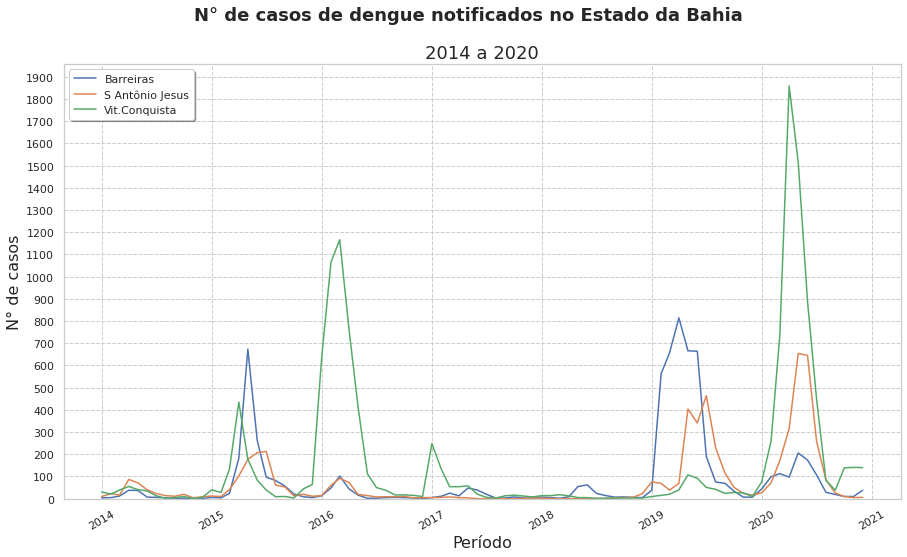

In [151]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid") 
plt.figure(figsize=(15, 8))

# Separando as microrregiões:
dados_mensais_divididos_3_mr = dados_mensais_divididos.query("microrregiao == ['Barreiras','S Antônio Jesus','Vit.Conquista']")

# Desenhando o gráfico
ax = sns.lineplot(data=dados_mensais_divididos_3_mr, x="ano_mes_dia", y="qtd_casos", hue="microrregiao")
ax.set_yticks(range(0, dados_mensais_divididos_3_mr.qtd_casos.max() + 100, 100))

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("N° de casos de dengue notificados no Estado da Bahia", size = 18, weight='bold')
plt.title("2014 a 2020", size = 18)
plt.ylabel("N° de casos", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.legend(loc='best', shadow=True, fancybox=True)
plt.grid(linestyle = '--')

# # Ajustando o gráfico de 0 até 100 casos acima do máximo entre as três microrregiões
plt.ylim(0, dados_mensais_divididos_3_mr.qtd_casos.max() + 100)

# Oculta as informações no topo do gráfico
plt.show()

Analisando brevemente os dados das três microrregiões, podemos notar uma tendência em que mesmo sendo distantes uma da outra (como observado no mapa abaixo) e com climas diferentes(Tropical semi-árido, Tropical e Tropical de altitude, respectivamente) as microrregiões apresentaram picos de casos de dengue em período do ano bem próximos. Comparando ano a ano é possível notar, também, que a maior parte das notificações dos casos ocorre durante o 1° semestre e que no ano de 2020 tivemos uma alta brusca de casos de dengue, sendo as maiores dentro do período investigado em Santo Antônio de Jesus e Vitória da Conquista, mas em Barreiras, essa evolução foi mais branda se comaparada ao ano de 2015 e 2019, respectivamente.

<img src="https://i.imgur.com/mavOsH6.png" alt="Microrregiões da Bahia" width="50%">

#### Comparando casos ano a ano

Primeiro vamos separar em duas colunas os meses e anos:

In [152]:
dados_mensais_divididos["mes"] = dados_mensais_divididos["ano_mes_dia"].dt.month
dados_mensais_divididos["ano"] = dados_mensais_divididos["ano_mes_dia"].dt.year

dados_mensais_divididos.head()

,ano_mes_dia,microrregiao,qtd_casos,mes,ano
0,2014-01-01,Barreiras,4,1,2014
1,2014-02-01,Barreiras,5,2,2014
2,2014-03-01,Barreiras,12,3,2014
3,2014-04-01,Barreiras,38,4,2014
4,2014-05-01,Barreiras,37,5,2014


Continuando a análise da Microrregião de Santo Antonio de Jesus, vamos verificar a tendência das notificações dos casos de dengue por mês em relação a cada ano, entre 2014 a 2020.

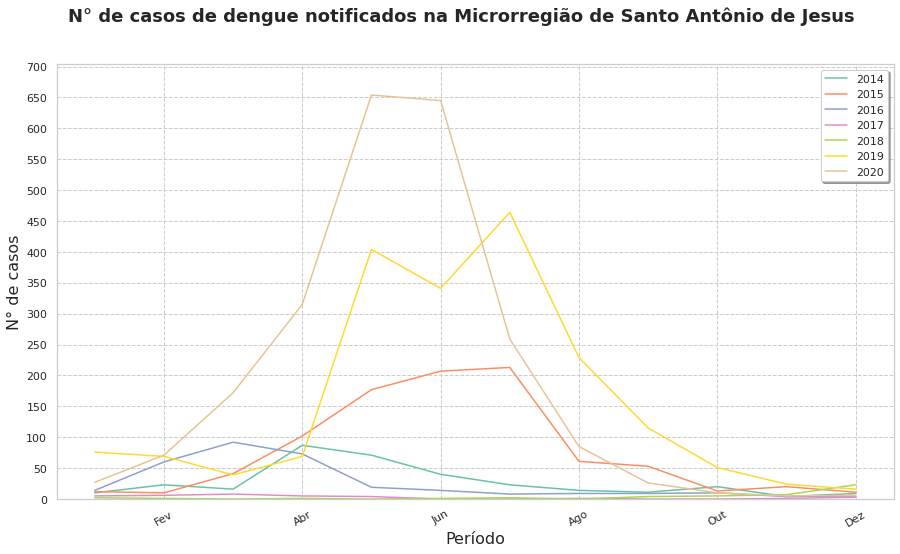

In [153]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid")
plt.figure(figsize=(15, 8))

# Separando as microrregião de SAJ:
dados_mensais_divididos_SAJ = dados_mensais_divididos.query("microrregiao == 'S Antônio Jesus'")

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.lineplot(data=dados_mensais_divididos_SAJ, x="mes", y="qtd_casos", hue="ano", palette='Set2')
ax.set_yticks(range(0, dados_mensais_divididos_SAJ.qtd_casos.max() + 50, 50))
ax.set_xticks(range(2,13,2))
ax.set_xticklabels([mes for mes in meses if meses[mes] % 2 == 0])

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("N° de casos de dengue notificados na Microrregião de Santo Antônio de Jesus", size = 18, weight='bold')
plt.ylabel("N° de casos", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.legend(loc='best', shadow=True, fancybox=True)
plt.grid(linestyle = '--')

# Ajustando o gráfico de 0 a 140 milhões
plt.ylim(0, dados_mensais_divididos_SAJ.qtd_casos.max() + 50)

# Oculta as informações no topo do gráfico
plt.show()

Como podemos notar no gráfico, temos uma maior concentração da notificação de casos de dengue entre os meses de abril a agosto (outono/inverno) nos anos em que houve um pico de casos de dengue. Essa alta tem certa relação com o período de chuvas na microrregião que normalmente ocorre entre os meses de fevereiro a julho, com maior intensidade no período de Abril. 

Agora, para plotarmos o gráfico de barras dos casos de dengue notificados na  Microrregião de Santo Antônio de Jesus durante 2014 a 2020, vamos inicialmente agrupar o nosso dataframe pela soma dos casos por mês.

In [154]:
dados_mensais_divididos_SAJ.head()

,ano_mes_dia,microrregiao,qtd_casos,mes,ano
1596,2014-01-01,S Antônio Jesus,10,1,2014
1597,2014-02-01,S Antônio Jesus,23,2,2014
1598,2014-03-01,S Antônio Jesus,16,3,2014
1599,2014-04-01,S Antônio Jesus,87,4,2014
1600,2014-05-01,S Antônio Jesus,71,5,2014


In [162]:
notificado_por_ano_SAJ = dados_mensais_divididos_SAJ.groupby("ano").sum()
notificado_por_ano_SAJ

,qtd_casos,mes
ano,,
2014,328,78
2015,920,78
2016,317,78
2017,33,78
2018,46,78
2019,1897,78
2020,2275,78


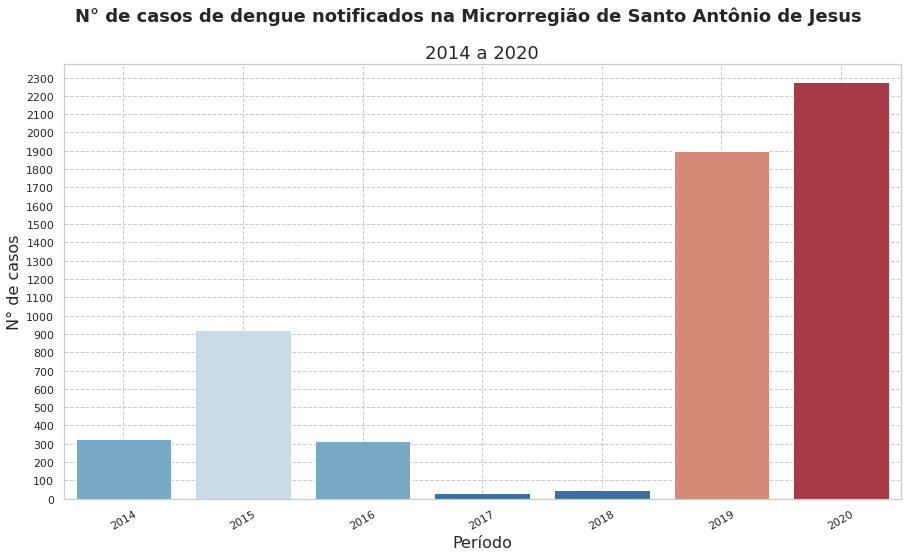

In [161]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid")
plt.figure(figsize=(15, 8))

def cores_pelos_valores(valor, nome_palette):
    # normalizando os valores entre [0, 1]
    valores_normalizados = (valor - min(valor)) / (max(valor) - min(valor))
    # convertendo para os indices de cores
    indices_cor = np.round(valores_normalizados * (len(valor) - 1)).astype(np.int32)
    # usando os indices para definir as cores em ordem crescente
    palette = sns.color_palette(nome_palette, len(valor))
    return np.array(palette).take(indices_cor, axis=0)

# Desenhando o gráfico e colocando o valor do gasto de maneira que fique mais fácil a leitura
ax = sns.barplot(data=notificado_por_ano_SAJ, x=notificado_por_ano_SAJ.index, y="qtd_casos", 
                 palette=cores_pelos_valores(notificado_por_ano_SAJ["qtd_casos"], "RdBu_r"))
ax.set_yticks(range(0, notificado_por_ano_SAJ.qtd_casos.max() + 100, 100))

# Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
plt.xticks(rotation=30)

# Adicionando título e subtítulo em nosso gráfico e nomeando os eixos
plt.suptitle("N° de casos de dengue notificados na Microrregião de Santo Antônio de Jesus",
             size = 18, weight='bold')
plt.title("2014 a 2020", size = 18)
plt.ylabel("N° de casos", fontdict={'fontsize': 16})
plt.xlabel("Período", fontdict={'fontsize': 16})
plt.grid(linestyle = '--')

# Ajustando o gráfico de 0 a 1 bilhão
plt.ylim(0, notificado_por_ano_SAJ.qtd_casos.max() + 100)

# Oculta as informações no topo do gráfico
plt.show()

Vamos continuar a nossa análise, agora voltando ao caso das 3 microrregiões já escolhidas

In [167]:
microrregioes = ['Barreiras', 'S Antônio Jesus', 'Vit.Conquista']
dados_anuais_3_mr = dados_mensais_divididos.query("microrregiao in @microrregioes").groupby(["microrregiao", "ano"]).sum().reset_index()
dados_anuais_3_mr.head()

,microrregiao,ano,qtd_casos,mes
0,Barreiras,2014,119,78
1,Barreiras,2015,1424,78
2,Barreiras,2016,246,78
3,Barreiras,2017,181,78
4,Barreiras,2018,204,78


<Figure size 1080x576 with 0 Axes>

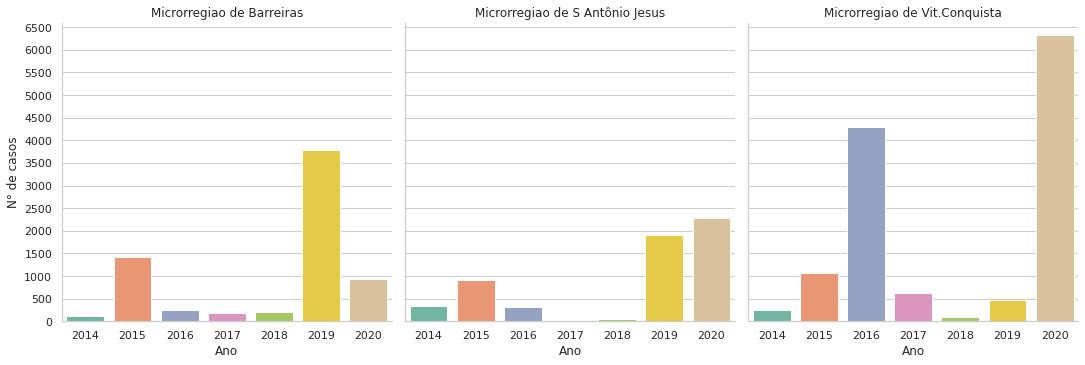

In [177]:
#Importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Colocando nosso gráfico para ficar com configurações adequadas para serem visualizadas
# no Jupyter Notebook e configurando o tamanho de nossa figura.
sns.set(context="notebook", style= "whitegrid")
plt.figure(figsize=(15, 8))

# Desenhando o gráfico
ax = sns.catplot(data=dados_anuais_3_mr, x="ano", y="qtd_casos", kind="bar", col="microrregiao", palette="Set2")
ax.set_axis_labels("Ano", "N° de casos")
ax.set_titles(col_template="Microrregiao de {col_name}")
ax.set(ylim=(0, 6600), yticks= range(0, 6600, 500))

# # Ajustando a posição das variáveis dos estados no eixo horizontal para caberem na tela corretamente e não dificultar a leitura
# plt.xticks(rotation=30)

Com o gráfico de barras fica mais fácil de notar os anos com mais casos em cada região e comparar como tem sido o avanço dos casos. É possivel notar que o ano de 2015 e 2020 foram anos com grandes casos em comum às microrregiões. Em 2016, pode ser notado um grande surto de casos de dengue em Vitória da Conquista, com mais de 4000 casos e em 2019 em Barreiras. Na microrregião de Santo Antônio de Jesus, não se nota um grande número de casos em relação às outras duas microrregiões, mas houve um aumento preocupante de casos notificados nos últimos 2 anos, em relação 2017 e 2018, seguindo uma tendência contrária ao que aparentava estar com um maior controle dos casos de dengue.